# Colorado Flood Geotiff Lesson-Open Raster Data in Python

### https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


Extracted output to C:\Users\emack\earth-analytics\data\colorado-flood\.


In [4]:
# Open raster data
lidar_dem = rio.open(
    'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

In [5]:
# Query the spatial extent of the data
lidar_dem.bounds

## BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

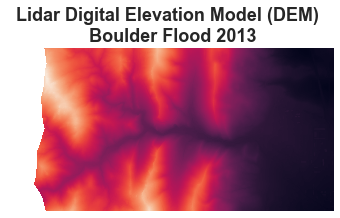

In [6]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()
